In [111]:
# import libraries
from pandas import read_csv , set_option
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [66]:
# Load Data
data = read_csv("housing2.csv")

In [67]:
# sahpe
data.shape

(506, 14)

In [68]:
print(data.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


In [69]:
print(data.head(20).to_string())

        CRIM    ZN  INDUS  CHAS   NOX    RM    AGE   DIS  RAD    TAX  PTRATIO       B  LSTAT  MEDV
0   6.32e-03  18.0   2.31   0.0  0.54  6.58   65.2  4.09  1.0  296.0     15.3  396.90   4.98  24.0
1   2.73e-02   0.0   7.07   0.0  0.47  6.42   78.9  4.97  2.0  242.0     17.8  396.90   9.14  21.6
2   2.73e-02   0.0   7.07   0.0  0.47  7.18   61.1  4.97  2.0  242.0     17.8  392.83   4.03  34.7
3   3.24e-02   0.0   2.18   0.0  0.46  7.00   45.8  6.06  3.0  222.0     18.7  394.63   2.94  33.4
4   6.91e-02   0.0   2.18   0.0  0.46  7.15   54.2  6.06  3.0  222.0     18.7  396.90   5.33  36.2
5   2.99e-02   0.0   2.18   0.0  0.46  6.43   58.7  6.06  3.0  222.0     18.7  394.12   5.21  28.7
6   8.83e-02  12.5   7.87   0.0  0.52  6.01   66.6  5.56  5.0  311.0     15.2  395.60  12.43  22.9
7   1.45e-01  12.5   7.87   0.0  0.52  6.17   96.1  5.95  5.0  311.0     15.2  396.90  19.15  27.1
8   2.11e-01  12.5   7.87   0.0  0.52  5.63  100.0  6.08  5.0  311.0     15.2  386.63  29.93  16.5
9   1.70e-

In [70]:
set_option('display.precision', 2)
describe = data.describe()
print(describe)

           CRIM      ZN   INDUS    CHAS     NOX      RM     AGE     DIS  \
count  5.06e+02  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean   3.61e+00   11.36   11.14    0.07    0.55    6.28   68.57    3.80   
std    8.60e+00   23.32    6.86    0.25    0.12    0.70   28.15    2.11   
min    6.32e-03    0.00    0.46    0.00    0.39    3.56    2.90    1.13   
25%    8.20e-02    0.00    5.19    0.00    0.45    5.89   45.02    2.10   
50%    2.57e-01    0.00    9.69    0.00    0.54    6.21   77.50    3.21   
75%    3.68e+00   12.50   18.10    0.00    0.62    6.62   94.07    5.19   
max    8.90e+01  100.00   27.74    1.00    0.87    8.78  100.00   12.13   

          RAD     TAX  PTRATIO       B   LSTAT    MEDV  
count  506.00  506.00   506.00  506.00  506.00  506.00  
mean     9.55  408.24    18.46  356.67   12.65   22.53  
std      8.71  168.54     2.16   91.29    7.14    9.20  
min      1.00  187.00    12.60    0.32    1.73    5.00  
25%      4.00  279.00    17.40  375.38 

In [71]:
correlations = data.corr(method = "pearson")
print(correlations.to_string())

         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  PTRATIO     B  LSTAT  MEDV
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58     0.29 -0.39   0.46 -0.39
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31    -0.39  0.18  -0.41  0.36
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72     0.38 -0.36   0.60 -0.48
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04    -0.12  0.05  -0.05  0.18
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67     0.19 -0.38   0.59 -0.43
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29    -0.36  0.13  -0.61  0.70
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51     0.26 -0.27   0.60 -0.38
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53    -0.23  0.29  -0.50  0.25
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 

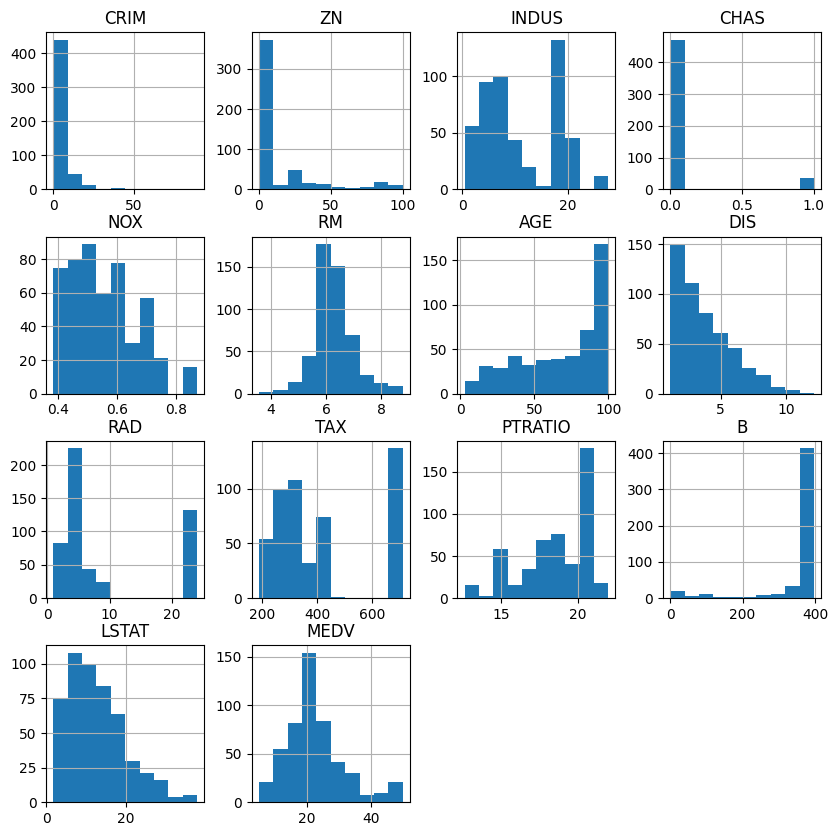

In [72]:
# histagram
data.hist(sharex = False, sharey=False, figsize = (10,10))
plt.show()

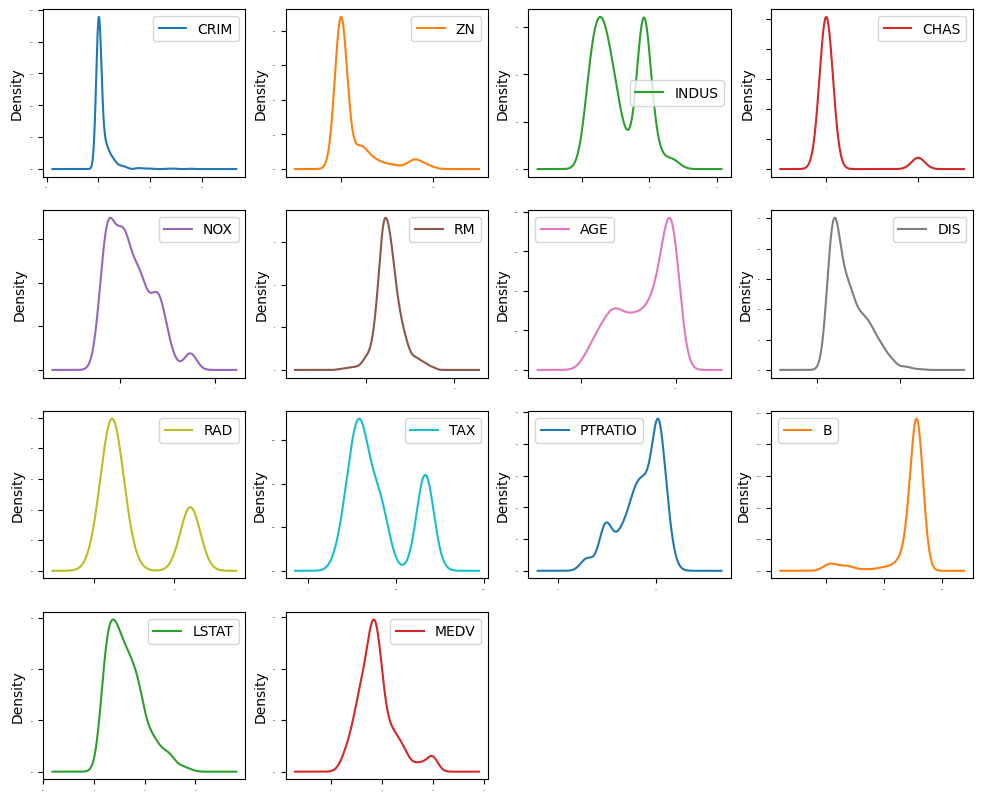

In [73]:
# Density
data.plot(kind = "density", subplots= True, sharex = False, sharey = False, legend=True, fontsize =1 , layout = (4,4) , figsize=(12,10))
plt.show()

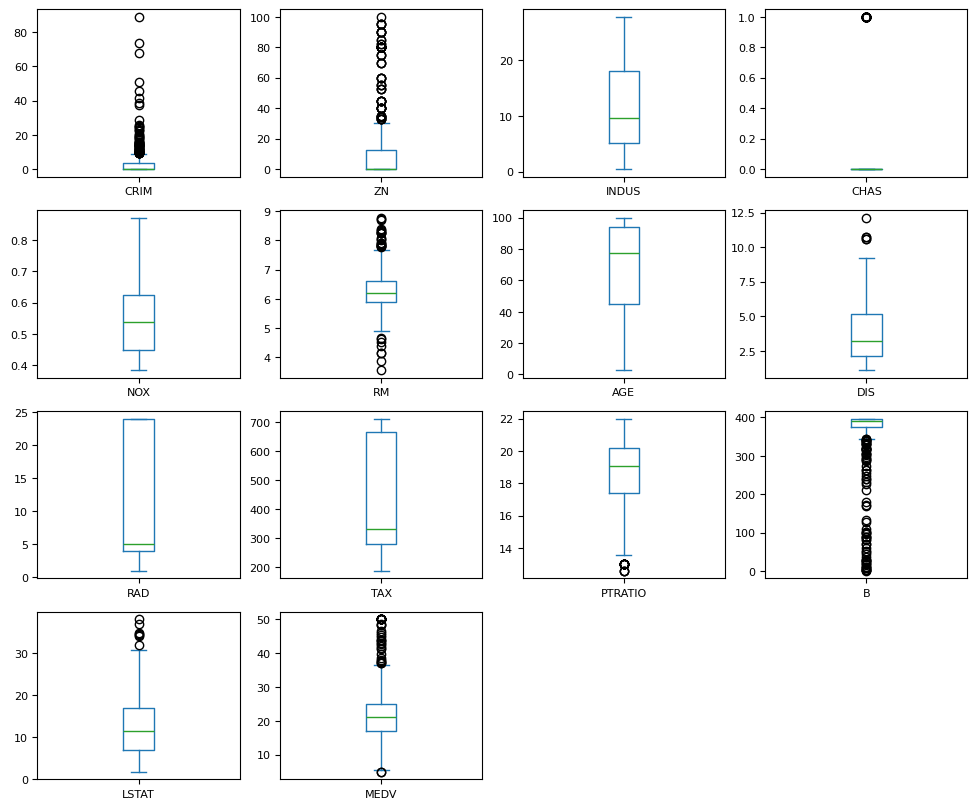

In [74]:
# Box Plot
data.plot(kind="box", sharex = False, sharey = False, fontsize = 8, figsize = (12,10), layout = (4,4) , subplots = True)
plt.show()

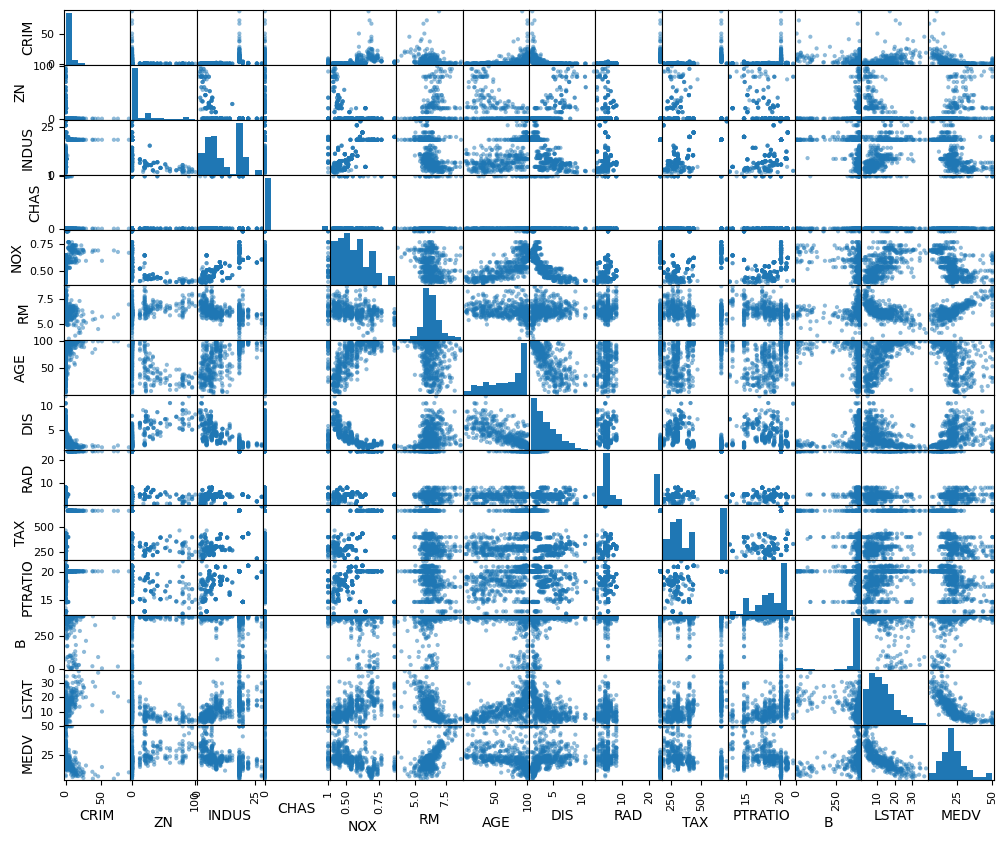

In [75]:
# scatter_matrix
scatter_matrix(data, figsize=(12,10))
plt.show()

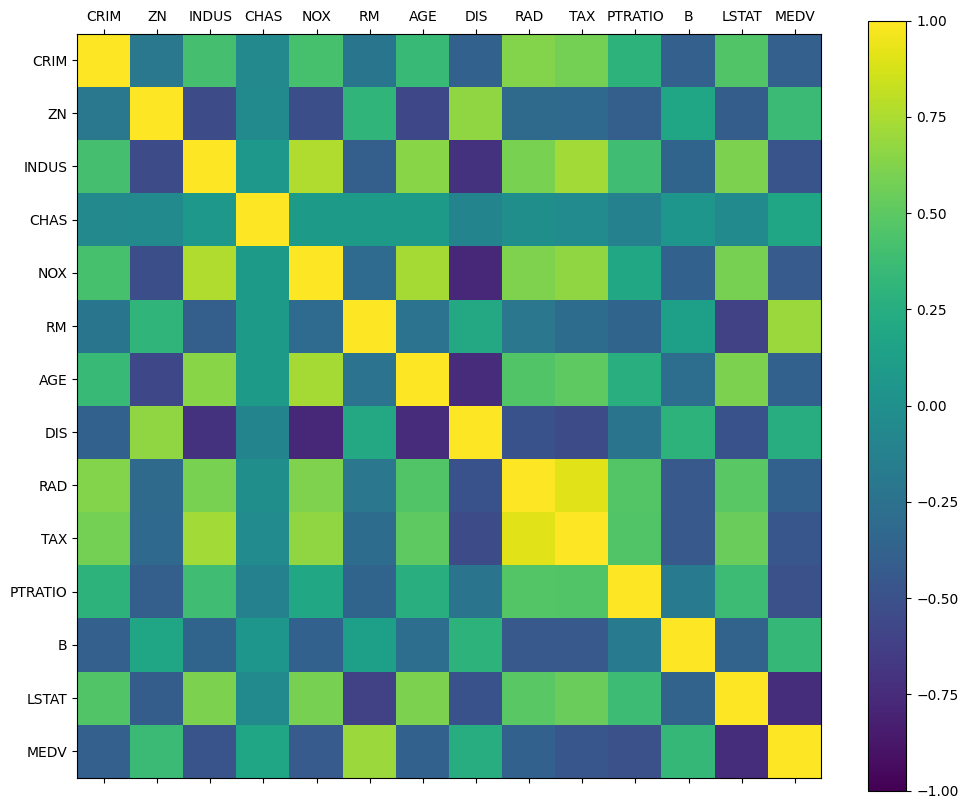

In [76]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']

fig = plt.figure(figsize=(12,10))

ax = fig.add_subplot(111)

cax = ax.matshow(correlations , vmin = -1 , vmax = 1)
fig.colorbar(cax)

ticks = np.arange(0,14,1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [77]:
# split out
array = data.values

X = array[: , 0:13]
Y = array[: , 13]

validation_size = 0.20
seed = 7

X_train , X_validation , Y_train , Y_validation = train_test_split(X,Y, test_size = validation_size , random_state=seed)

In [78]:
# test option and validation metric
models = []
models.append(("LR", LinearRegression()))
models.append(("LASSO", Lasso()))
models.append(("EN", ElasticNet()))
models.append(("CART", DecisionTreeRegressor()))
models.append(("SVR", SVR()))
models.append(("KNN", KNeighborsRegressor()))


In [79]:
scoring = "neg_mean_squared_error"
num_folds = 10
results = []
names = []
for name , model in models:
    kfold = KFold(n_splits = num_folds , random_state = seed , shuffle = True)
    cv_results = cross_val_score(model, X_train , Y_train , cv=kfold , scoring=scoring)
    names.append(name)
    results.append(cv_results)
    msg = "%s : %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)
    

LR : -22.006009 (12.188886)
LASSO : -27.105803 (13.165915)
EN : -27.923014 (13.156405)
CART : -25.863323 (18.053849)
SVR : -67.824705 (32.801530)
KNN : -39.808936 (16.507968)


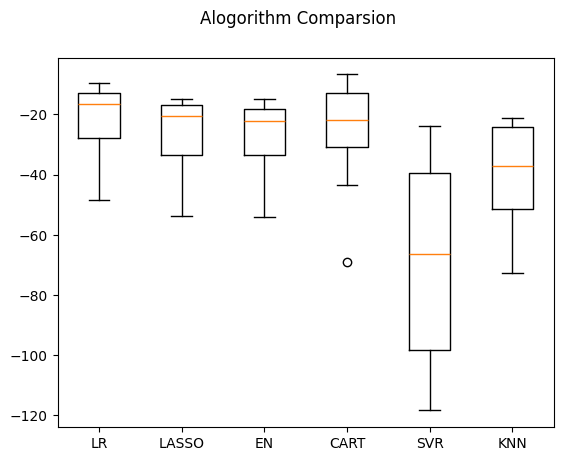

In [80]:
# Alogorithm Comparsion
fig = plt.figure()
fig.suptitle("Alogorithm Comparsion")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [90]:
pipelines = []
pipelines.append(("ScaledLR", Pipeline([("Scaler", StandardScaler()), ("LR", LinearRegression())])))
pipelines.append(("ScaledLASSO", Pipeline([("Scaler", StandardScaler()), ("LASSO", Lasso())])))
pipelines.append(("ScaledEN", Pipeline([("Scaler", StandardScaler()), ("EN", ElasticNet())])))
pipelines.append(("ScaledCART", Pipeline([("Scaler", StandardScaler()), ("CART", DecisionTreeRegressor())])))
pipelines.append(("ScaledSVR", Pipeline([("Scaler", StandardScaler()), ("SVR", SVR())])))
pipelines.append(("ScaledKNN", Pipeline([("Scaler", StandardScaler()), ("KNN", KNeighborsRegressor())])))

results = []
names = []
for name , model in pipelines:
    kfold = KFold(n_splits = num_folds , random_state = seed , shuffle = True)
    cv_results = cross_val_score(model, X_train , Y_train , cv=kfold , scoring=scoring)
    names.append(name)
    results.append(cv_results)
    msg = "%s : %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)



ScaledLR : -22.006009 (12.188886)
ScaledLASSO : -27.205896 (12.124418)
ScaledEN : -28.301160 (13.609110)
ScaledCART : -27.116417 (17.079477)
ScaledSVR : -29.570433 (18.052964)
ScaledKNN : -21.456867 (15.016218)


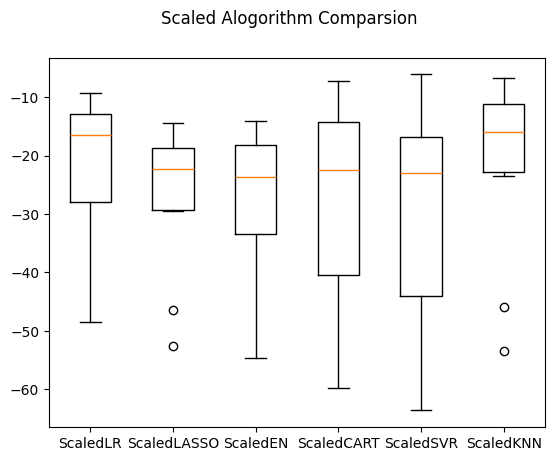

In [91]:
# Scaled Alogorithm Comparsion
fig = plt.figure()
fig.suptitle("Scaled Alogorithm Comparsion")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [109]:
# KNN Algorithm Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([1,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23])
kfold = KFold(n_splits = num_folds , random_state = 7 , shuffle = True)
param_grid = dict(n_neighbors = k_values)
model = KNeighborsRegressor()

grid = GridSearchCV(estimator = model , param_grid = param_grid , cv=kfold , scoring=scoring)
grid_result = grid.fit(rescaledX , Y_train)
print("Best: %f using %s"% (grid_result.best_score_ , grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean , stdev , param in zip(means , stds , params):
    print("%f (%f) with : %r"% (mean , stdev , param))

Best: -19.497829 using {'n_neighbors': np.int64(1)}
-19.497829 (15.769847) with : {'n_neighbors': np.int64(1)}
-19.977984 (13.803973) with : {'n_neighbors': np.int64(3)}
-20.776002 (13.531363) with : {'n_neighbors': np.int64(4)}
-21.270967 (14.833544) with : {'n_neighbors': np.int64(5)}
-21.611096 (14.511307) with : {'n_neighbors': np.int64(6)}
-21.577292 (14.952592) with : {'n_neighbors': np.int64(7)}
-20.998016 (13.838960) with : {'n_neighbors': np.int64(8)}
-21.001075 (14.701297) with : {'n_neighbors': np.int64(9)}
-21.490306 (14.866957) with : {'n_neighbors': np.int64(11)}
-21.432419 (15.123005) with : {'n_neighbors': np.int64(12)}
-21.268533 (14.454969) with : {'n_neighbors': np.int64(13)}
-21.704554 (14.386211) with : {'n_neighbors': np.int64(14)}
-21.968092 (14.209894) with : {'n_neighbors': np.int64(15)}
-22.158751 (14.229562) with : {'n_neighbors': np.int64(16)}
-22.739880 (14.492752) with : {'n_neighbors': np.int64(17)}
-23.324657 (14.666428) with : {'n_neighbors': np.int64(1

In [112]:
ensembles = []
ensembles.append(("ScaledRF", Pipeline([("Scaler", StandardScaler()), ("RF", RandomForestRegressor())])))
ensembles.append(("ScaledET", Pipeline([("Scaler", StandardScaler()), ("ET", ExtraTreesRegressor())])))
ensembles.append(("ScaledAB", Pipeline([("Scaler", StandardScaler()), ("AB", AdaBoostRegressor())])))
ensembles.append(("ScaledGB", Pipeline([("Scaler", StandardScaler()), ("GB", GradientBoostingRegressor())])))


results = []
names = []
for name , model in ensembles:
    kfold = KFold(n_splits = num_folds , random_state = seed , shuffle = True)
    cv_results = cross_val_score(model, X_train , Y_train , cv=kfold , scoring=scoring)
    names.append(name)
    results.append(cv_results)
    msg = "%s : %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)

ScaledRF : -12.724569 (9.437156)
ScaledET : -9.086794 (6.808856)
ScaledAB : -15.993951 (8.258167)
ScaledGB : -10.933924 (8.579589)


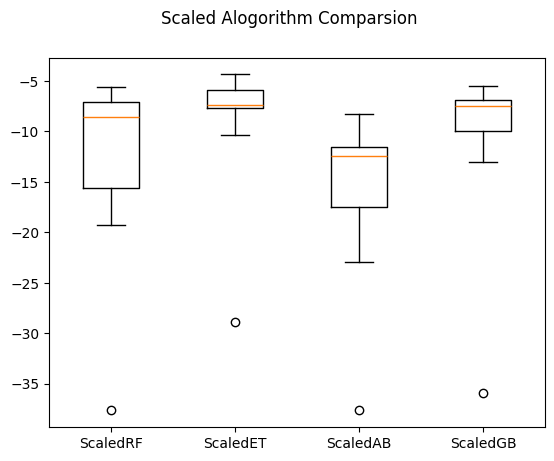

In [113]:
# Scaled Alogorithm Comparsion
fig = plt.figure()
fig.suptitle("Scaled Alogorithm Comparsion")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [115]:
# Extra trees Algorithm Tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = np.array([50,100,150,200,250,300,350,400])
kfold = KFold(n_splits = num_folds , random_state = 7 , shuffle = True)
param_grid = dict(n_estimators = k_values)
model = ExtraTreesRegressor()

grid = GridSearchCV(estimator = model , param_grid = param_grid , cv=kfold , scoring=scoring)
grid_result = grid.fit(rescaledX , Y_train)
print("Best: %f using %s"% (grid_result.best_score_ , grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean , stdev , param in zip(means , stds , params):
    print("%f (%f) with : %r"% (mean , stdev , param))

Best: -8.966248 using {'n_estimators': np.int64(350)}
-9.205190 (6.726779) with : {'n_estimators': np.int64(50)}
-9.023186 (6.319268) with : {'n_estimators': np.int64(100)}
-9.075393 (6.622805) with : {'n_estimators': np.int64(150)}
-9.175683 (6.423059) with : {'n_estimators': np.int64(200)}
-9.123517 (6.547379) with : {'n_estimators': np.int64(250)}
-9.100023 (6.561648) with : {'n_estimators': np.int64(300)}
-8.966248 (6.394836) with : {'n_estimators': np.int64(350)}
-9.213317 (6.648878) with : {'n_estimators': np.int64(400)}
